<a href="https://colab.research.google.com/github/yuanfeiwo/test-firstrepository/blob/master/Module5_5_7_Comparing_AutoML_Frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing AutoML Frameworks

#### In the previous notebooks, we saw how to use different AutoML frameworks for regression. here we will try to see how these different frameworks, namely TPOT, H2O AutoML and auto-sklearn, compare against each other.

## Underlying Algorithm

Even though all the 3 frameworks use Auto ML as the underlying principle, Auto ML is just a concept and can be implemented in differnet ways.

### [TPOT](https://epistasislab.github.io/tpot/)

AutoML is the process of automating an end-to-end Machine Learning pipeline. TPOT specifically **uses genetic programming to optimise these pipelines** by selecting the best model and its hyperparameters.

TPOT is built on top of scikit-learn and uses scikit learn pipelines as the models.


Here is one an example of one of the TPOT pipeline:

![TPOT](https://raw.githubusercontent.com/EpistasisLab/tpot/master/images/tpot-pipeline-example.png)

### [H2O](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

The H2O AutoML interface is designed to have as few parameters as possible so that all the user needs to do is point to their dataset, identify the response column and optionally specify a time constraint or limit on the number of total models trained.


H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. **Stacked Ensembles** – one based on all previously trained models, another one on the best model of each family – will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

### [auto-sklearn](https://automl.github.io/auto-sklearn/stable/)

auto-sklearn specifically uses **Bayesian optimization, meta-learning and ensemble construction** to optimise these pipleines by selecting the best model and its hyperparamters.


Auto-sklearn makes use of scikit-learn pipelines, which contain a series of steps to be performed in a single run. These steps include two major steps, data preprocessing and model selection.

## Minimum code required

### TPOT

*iris = load_iris()  
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),  
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25)*  
  
*tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)  
tpot.fit(X_train, y_train)  
print(tpot.score(X_test, y_test))  
tpot.export('tpot_iris_pipeline.py')*

### H2O

H2O requires a H2O server running before training the models. This requires Java to be installed on the host.

*import h2o  
h2o.init(ip="localhost", port=54323)*

Also, H2O uses its own machine learning models and algorithms for training. it also requires data in H2ODataFrame format rather than regular pandas DataFrames, though converting is not that difficut as they have provided the API for that.

*hf = h2o.H2OFrame(df)  
splits = hf.split_frame(ratios = [0.8], seed = 1)  
train = splits[0]  
test = splits[1]  
aml = H2OAutoML(max_runtime_secs =600, seed = 1, project_name = "H2O_finance")  
aml.train(y = y, training_frame = train, leaderboard_frame = test)* 

### auto-sklearn

*import autosklearn.classification  
cls = autosklearn.classification.AutoSklearnClassifier()  
cls.fit(X_train, y_train)  
predictions = cls.predict(X_test)*

## Special Features

### TPOT export model

TPOT provides an API to export the best model obtained from the AutoML pipeline, as a python file. Supports scikit-learn models out-of-the-box.

### H2O Flow

H2O provides a minimal dashboard for visualing all the different runs of algorithms as well as training metrics, though, it requires Java to be installed. Offers a lot of data preprocessing options.

### auto-sklearn

Supports scikit-learn models out-of-the-box.

## Comparing performance on Lending Club Data
We used all the three libraries to predict interest rates on the Lending CLub Dataset. The pipelines were alowed to run for 10 mins each. Ideal recommendation in the documentation for all the libraries is to run the pipelines for atleast a few hours to get decent results.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
lib = ['TPOT','auto-sklearn','H2O'] 
MAPE_train = [0.272,  0.485,1.455]
MAPE_test= [5.334,  4.993,1.789]

df = pd.DataFrame(
    {'Library': lib,
     'MAPE_train': MAPE_train,
     'MAPE_test': MAPE_test
    })
print(df)

        Library  MAPE_train  MAPE_test
0          TPOT       0.272      5.334
1  auto-sklearn       0.485      4.993
2           H2O       1.455      1.789


### MAPE Train

Within the limited time of 10 mins and with default configurations, H2O had the lowest Mean Absolute Percentage Error on the training data.

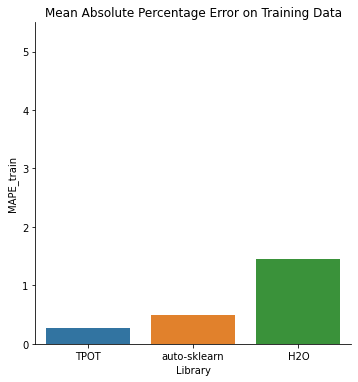

In [3]:
sns.factorplot(x='Library', y='MAPE_train', data=df, kind='bar')
plt.title("Mean Absolute Percentage Error on Training Data")
plt.ylim(0, 5.5)
plt.show()

Mean Absolute Percentage Error even for the testing data was lowest for H2O.

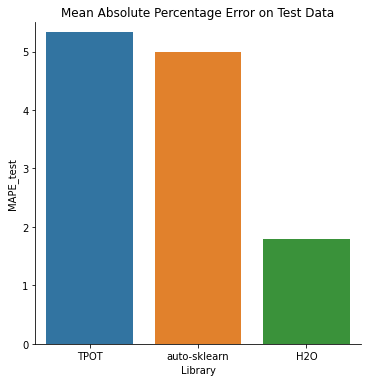

In [4]:
sns.factorplot(x='Library', y='MAPE_test',  data=df, kind='bar')
plt.title("Mean Absolute Percentage Error on Test Data")
plt.ylim(0, 5.5)
plt.show()

### Comparing automl with the machine learning algorithms we tried earlier on the same dataset

In [5]:
lib = ['Linear Regression','Neural Network','Random Forest','TPOT','auto-sklearn','H2O', ] 
MAPE_test= [19.336,6.329,5.713, 5.334,  4.993,1.789]

df = pd.DataFrame(
    {'Library': lib,
     'MAPE_test': MAPE_test
    })
print(df)

             Library  MAPE_test
0  Linear Regression     19.336
1     Neural Network      6.329
2      Random Forest      5.713
3               TPOT      5.334
4       auto-sklearn      4.993
5                H2O      1.789


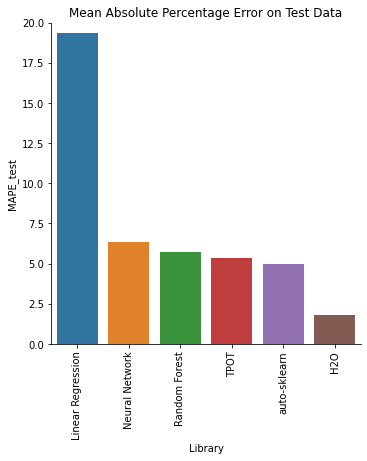

In [6]:
k = sns.factorplot(x='Library', y='MAPE_test', data=df, kind='bar')
k.set_xticklabels(rotation=90)
plt.title("Mean Absolute Percentage Error on Test Data")
plt.ylim(0, 20)
plt.show()